In [287]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
import math
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [288]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)



In [289]:
#X['happyage'] = np.log(X['happy']*X['agea']+1)
X['beh'] = np.log(X['pplfair']*X['pplhlp']+1)
X = X.drop(['tvtot','CH','CZ','DE','ES','NO','SE','gndr','pplhlp','pplfair','year','sclact','ppltrst','beh'],axis=1)
X.head()

,happy,sclmeet,agea
0,8.0,5.0,60.0
1,9.0,3.0,59.0
2,7.0,6.0,24.0
3,10.0,6.0,64.0
4,8.0,7.0,55.0


In [290]:
names = X.columns
X = pd.DataFrame(preprocessing.scale(X), columns = names)

In [291]:
X.corr()


,happy,sclmeet,agea
happy,1.000000,0.182944,-0.042970
sclmeet,0.182944,1.000000,-0.194443
agea,-0.042970,-0.194443,1.000000


In [292]:
# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]


In [329]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}


# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.04800872885979269
Percent Type II errors: 0.1901254773595199

Test set accuracy:
Percent Type I errors: 0.049079754601226995
Percent Type II errors: 0.20613496932515338


In [337]:
param_test1 = {'n_estimators':range(1,500,10)}

gsearch1 = GridSearchCV(estimator = clf, 
param_grid = param_test1, scoring='precision',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

D:\Users\Borja.gonzalez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.00000, std: 0.00000, params: {'n_estimators': 1},
  mean: 0.86019, std: 0.05544, params: {'n_estimators': 11},
  mean: 0.83823, std: 0.05209, params: {'n_estimators': 21},
  mean: 0.83173, std: 0.04706, params: {'n_estimators': 31},
  mean: 0.81438, std: 0.04815, params: {'n_estimators': 41},
  mean: 0.80248, std: 0.03971, params: {'n_estimators': 51},
  mean: 0.80498, std: 0.03746, params: {'n_estimators': 61},
  mean: 0.79075, std: 0.03042, params: {'n_estimators': 71},
  mean: 0.79012, std: 0.03073, params: {'n_estimators': 81},
  mean: 0.78728, std: 0.02919, params: {'n_estimators': 91},
  mean: 0.78479, std: 0.02937, params: {'n_estimators': 101},
  mean: 0.78284, std: 0.02887, params: {'n_estimators': 111},
  mean: 0.78229, std: 0.02926, params: {'n_estimators': 121},
  mean: 0.78253, std: 0.02916, params: {'n_estimators': 131},
  mean: 0.77717, std: 0.03270, params: {'n_estimators': 141},
  mean: 0.77835, std: 0.03295, params: {'n_estimators': 151},
  mean: 0.77931, st

In [339]:
params2 = {'loss': 'deviance',
          'min_samples_split': 800,
          'min_samples_leaf': 60,
          'max_features': 3,
          'random_state': 10,
          'learning_rate': 0.06,
           'n_estimators': 11,
          'max_depth': 100,
         'subsample': 1}


# Initialize and fit the model.
clf2 = ensemble.GradientBoostingClassifier(**params2)
clf2.fit(X_train, y_train)

predict_train = clf2.predict(X_train)
predict_test = clf2.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.013911620294599018
Percent Type II errors: 0.24986361156573922

Test set accuracy:
Percent Type I errors: 0.025766871165644172
Percent Type II errors: 0.24049079754601227


In [340]:
param_test2 = {'max_depth':range(1,16,1), 'min_samples_split':range(200,2001,200)}
gsearch2 = GridSearchCV(estimator = clf2, 
param_grid = param_test2, scoring='recall',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train,y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

D:\Users\Borja.gonzalez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.33677, std: 0.03376, params: {'max_depth': 1, 'min_samples_split': 200},
  mean: 0.33677, std: 0.03376, params: {'max_depth': 1, 'min_samples_split': 400},
  mean: 0.33677, std: 0.03376, params: {'max_depth': 1, 'min_samples_split': 600},
  mean: 0.33677, std: 0.03376, params: {'max_depth': 1, 'min_samples_split': 800},
  mean: 0.33677, std: 0.03376, params: {'max_depth': 1, 'min_samples_split': 1000},
  mean: 0.33677, std: 0.03376, params: {'max_depth': 1, 'min_samples_split': 1200},
  mean: 0.33677, std: 0.03376, params: {'max_depth': 1, 'min_samples_split': 1400},
  mean: 0.33677, std: 0.03376, params: {'max_depth': 1, 'min_samples_split': 1600},
  mean: 0.33677, std: 0.03376, params: {'max_depth': 1, 'min_samples_split': 1800},
  mean: 0.33677, std: 0.03376, params: {'max_depth': 1, 'min_samples_split': 2000},
  mean: 0.34208, std: 0.03548, params: {'max_depth': 2, 'min_samples_split': 200},
  mean: 0.34208, std: 0.03548, params: {'max_depth': 2, 'min_samples_split': 400}

In [341]:
params3 = {'loss': 'deviance',
          'min_samples_split': 200,
          'min_samples_leaf': 60,
          'max_features': 3,
          'random_state': 10,
          'learning_rate': 0.06,
           'n_estimators': 11,
          'max_depth': 10,
         'subsample': 1}

# Initialize and fit the model.
clf3 = ensemble.GradientBoostingClassifier(**params3)
clf3.fit(X_train, y_train)

predict_train = clf3.predict(X_train)
predict_test = clf3.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.02386797599563557
Percent Type II errors: 0.22995090016366612

Test set accuracy:
Percent Type I errors: 0.0343558282208589
Percent Type II errors: 0.2294478527607362


In [342]:
param_test3 = {'max_features':range(1,3,1), 'min_samples_leaf':range(10,100,10)}
gsearch3 = GridSearchCV(estimator = clf3, 
param_grid = param_test3, scoring='precision',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X_train,y_train)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

D:\Users\Borja.gonzalez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.85573, std: 0.04010, params: {'min_samples_leaf': 10, 'max_features': 1},
  mean: 0.85757, std: 0.04014, params: {'min_samples_leaf': 20, 'max_features': 1},
  mean: 0.86275, std: 0.04726, params: {'min_samples_leaf': 30, 'max_features': 1},
  mean: 0.85865, std: 0.03717, params: {'min_samples_leaf': 40, 'max_features': 1},
  mean: 0.86444, std: 0.04267, params: {'min_samples_leaf': 50, 'max_features': 1},
  mean: 0.87300, std: 0.05322, params: {'min_samples_leaf': 60, 'max_features': 1},
  mean: 0.87793, std: 0.05080, params: {'min_samples_leaf': 70, 'max_features': 1},
  mean: 0.86841, std: 0.04864, params: {'min_samples_leaf': 80, 'max_features': 1},
  mean: 0.87523, std: 0.04711, params: {'min_samples_leaf': 90, 'max_features': 1},
  mean: 0.83852, std: 0.03123, params: {'min_samples_leaf': 10, 'max_features': 2},
  mean: 0.83280, std: 0.03493, params: {'min_samples_leaf': 20, 'max_features': 2},
  mean: 0.83963, std: 0.04506, params: {'min_samples_leaf': 30, 'max_feature

In [343]:
params4 = {'loss': 'deviance',
          'min_samples_split': 200,
          'min_samples_leaf': 70,
          'max_features': 1,
          'random_state': 10,
          'learning_rate': 0.06,
           'n_estimators': 11,
          'max_depth': 10,
         'subsample': 1}

# Initialize and fit the model.
clf4 = ensemble.GradientBoostingClassifier(**params4)
clf4.fit(X_train, y_train)

predict_train = clf4.predict(X_train)
predict_test = clf4.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.017866884888161485
Percent Type II errors: 0.23990725586470268

Test set accuracy:
Percent Type I errors: 0.03067484662576687
Percent Type II errors: 0.23067484662576687


In [344]:
param_test4 = {'min_impurity_decrease':range(1,100,10)}

gsearch4 = GridSearchCV(estimator = clf4, 
param_grid = param_test4, scoring='precision',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X_train,y_train)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

D:\Users\Borja.gonzalez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.87489, std: 0.04975, params: {'min_impurity_decrease': 1},
  mean: 0.89578, std: 0.04101, params: {'min_impurity_decrease': 11},
  mean: 0.90458, std: 0.03584, params: {'min_impurity_decrease': 21},
  mean: 0.90830, std: 0.03914, params: {'min_impurity_decrease': 31},
  mean: 0.00000, std: 0.00000, params: {'min_impurity_decrease': 41},
  mean: 0.00000, std: 0.00000, params: {'min_impurity_decrease': 51},
  mean: 0.00000, std: 0.00000, params: {'min_impurity_decrease': 61},
  mean: 0.00000, std: 0.00000, params: {'min_impurity_decrease': 71},
  mean: 0.00000, std: 0.00000, params: {'min_impurity_decrease': 81},
  mean: 0.00000, std: 0.00000, params: {'min_impurity_decrease': 91}],
 {'min_impurity_decrease': 31},
 0.9083003952508889)

In [345]:
param_test5 = {'learning_rate':np.linspace(0.05,0.2,11)}

gsearch5 = GridSearchCV(estimator = clf5, 
param_grid = param_test5, scoring='precision',n_jobs=4,iid=False, cv=5)
gsearch5.fit(X_train,y_train)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

D:\Users\Borja.gonzalez\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.91978, std: 0.03919, params: {'learning_rate': 0.050000000000000003},
  mean: 0.89580, std: 0.04432, params: {'learning_rate': 0.065000000000000002},
  mean: 0.87809, std: 0.05483, params: {'learning_rate': 0.080000000000000016},
  mean: 0.87013, std: 0.03984, params: {'learning_rate': 0.095000000000000015},
  mean: 0.85761, std: 0.03850, params: {'learning_rate': 0.11000000000000001},
  mean: 0.85449, std: 0.03474, params: {'learning_rate': 0.125},
  mean: 0.83729, std: 0.03373, params: {'learning_rate': 0.14000000000000001},
  mean: 0.83640, std: 0.03386, params: {'learning_rate': 0.15500000000000003},
  mean: 0.82379, std: 0.02679, params: {'learning_rate': 0.17000000000000004},
  mean: 0.81230, std: 0.02916, params: {'learning_rate': 0.18500000000000005},
  mean: 0.80286, std: 0.03054, params: {'learning_rate': 0.20000000000000001}],
 {'learning_rate': 0.050000000000000003},
 0.919784329140235)

In [347]:
params5 = {'loss': 'deviance',
          'min_samples_split': 200,
          'min_samples_leaf': 70,
          'max_features': 1,
          'random_state': 10,
          'learning_rate': 0.05,
           'n_estimators': 11,
          'max_depth': 10,
           'min_impurity_decrease': 31,
         'subsample': 1}

# Initialize and fit the model.
clf5 = ensemble.GradientBoostingClassifier(**params5)
clf5.fit(X_train, y_train)

predict_train = clf5.predict(X_train)
predict_test = clf5.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.009274413529732678
Percent Type II errors: 0.28614293507910527

Test set accuracy:
Percent Type I errors: 0.012269938650306749
Percent Type II errors: 0.2773006134969325


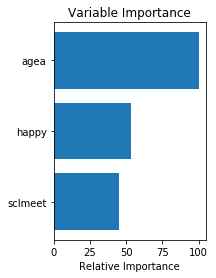

In [348]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()